Epoch 1/20
1/1 [==============================] - 0s 28ms/step
Discriminator loss: 0.6353934407234192
Generator loss: 0.8521708250045776
Epoch 2/20
1/1 [==============================] - 0s 45ms/step
Discriminator loss: 0.6078013181686401
Generator loss: 0.9616401791572571
Epoch 3/20
1/1 [==============================] - 0s 43ms/step
Discriminator loss: 0.5773860216140747
Generator loss: 1.0780079364776611
Epoch 4/20
1/1 [==============================] - 0s 57ms/step
Discriminator loss: 0.5503563284873962
Generator loss: 1.2011287212371826
Epoch 5/20
1/1 [==============================] - 0s 75ms/step
Discriminator loss: 0.5313212275505066
Generator loss: 1.3100839853286743
Epoch 6/20
1/1 [==============================] - 0s 44ms/step
Discriminator loss: 0.49456366896629333
Generator loss: 1.4074710607528687
Epoch 7/20
1/1 [==============================] - 0s 73ms/step
Discriminator loss: 0.4632924199104309
Generator loss: 1.5044844150543213
Epoch 8/20
1/1 [========================

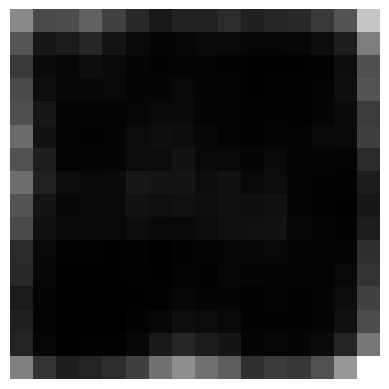

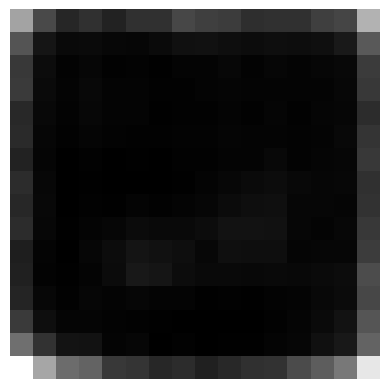

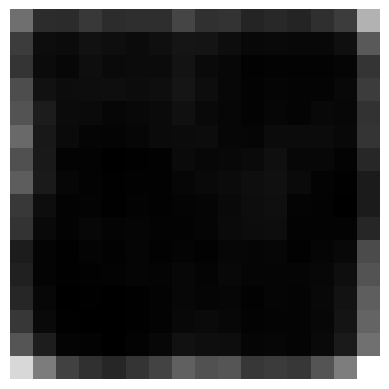

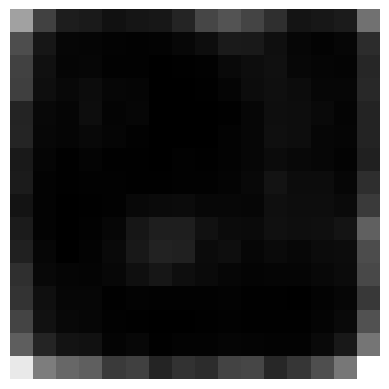

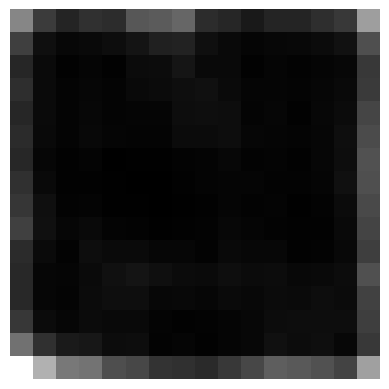

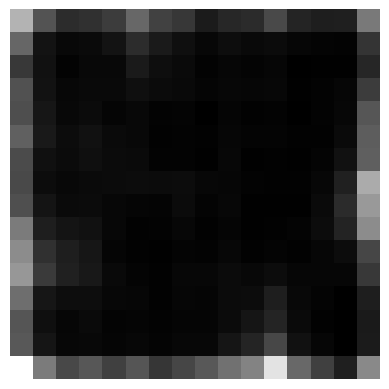

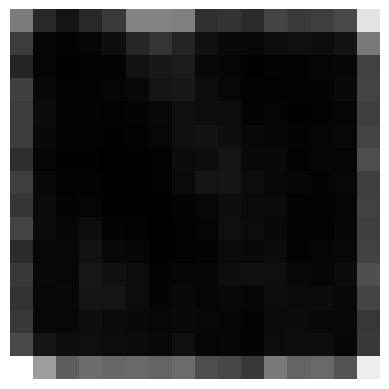

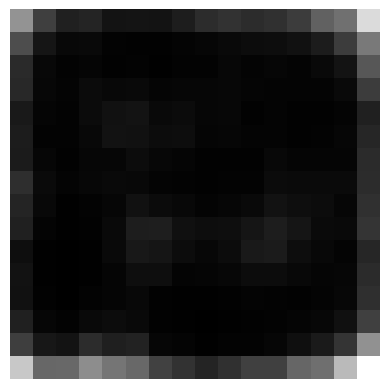

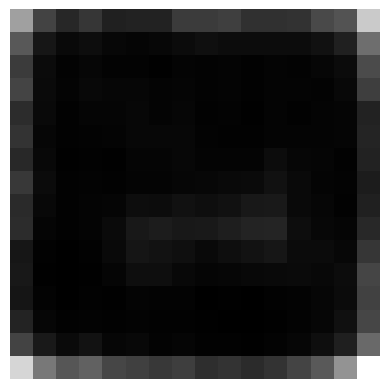

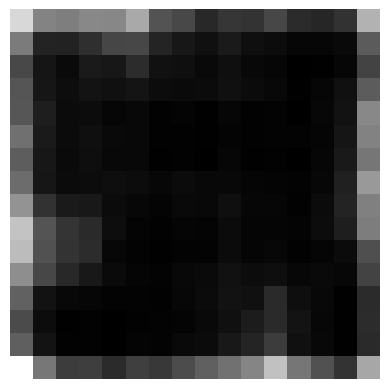

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Generate a small dataset of squares
num_samples = 100
image_size = 16

# Generate random squares
X_train = np.zeros((num_samples, image_size, image_size, 1))
for i in range(num_samples):
    x = np.random.randint(0, image_size - 4)
    y = np.random.randint(0, image_size - 4)
    X_train[i, x:x+4, y:y+4, 0] = 1.0

# Define the generator model
latent_dim = 10

generator = keras.Sequential([
    keras.Input(shape=(latent_dim,)),
    layers.Dense(8 * 8 * 16),
    layers.Reshape((8, 8, 16)),
    layers.Conv2DTranspose(32, 4, strides=2, padding="same"),
    layers.LeakyReLU(alpha=0.2),
    layers.Conv2D(1, 3, activation="sigmoid", padding="same"),
])

# Define the discriminator model
discriminator = keras.Sequential([
    keras.Input(shape=(image_size, image_size, 1)),
    layers.Conv2D(32, 3, strides=2, padding='same'),
    layers.LeakyReLU(alpha=0.2),
    layers.Flatten(),
    layers.Dense(1, activation="sigmoid"),
])

# Compile the discriminator
discriminator.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), loss="binary_crossentropy")

# Combine the generator and discriminator into a GAN
discriminator.trainable = False
gan_input = keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = keras.models.Model(gan_input, gan_output)
gan.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5), loss="binary_crossentropy")

# Training loop
epochs = 20
batch_size = 10

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for _ in range(num_samples // batch_size):
        # Train the discriminator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generated_images = generator.predict(noise)
        real_images = X_train[np.random.randint(0, X_train.shape[0], batch_size)]
        combined_images = np.concatenate([generated_images, real_images])
        labels = np.concatenate([np.zeros((batch_size, 1)), np.ones((batch_size, 1))])
        labels += 0.05 * np.random.random(labels.shape)
        discriminator_loss = discriminator.train_on_batch(combined_images, labels)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        misleading_targets = np.ones((batch_size, 1))
        generator_loss = gan.train_on_batch(noise, misleading_targets)

    # Visualize the progress
    print(f"Discriminator loss: {discriminator_loss}")
    print(f"Generator loss: {generator_loss}")

# Generate and save some sample images
num_samples = 10
noise = np.random.normal(0, 1, (num_samples, latent_dim))
generated_images = generator.predict(noise)

for i in range(num_samples):
    plt.imshow(generated_images[i].reshape(image_size, image_size), cmap="gray")
    plt.axis("off")
    plt.savefig(f"generated_image_{i}.png")
    plt.show()
